In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from zipfile import ZipFile
file_name='/content/drive/My Drive/steel-defect-detection.zip'
with ZipFile(file_name,'r') as Zip:
  Zip.extractall()

In [ ]:
df=pd.read_csv('train.csv')
df.head(2)

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...


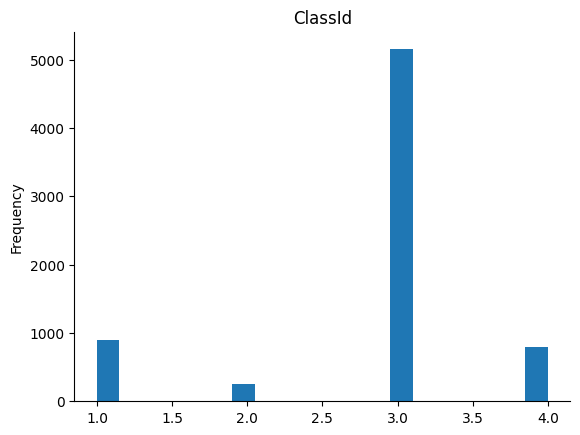

In [ ]:
#Frequency of Defect types(ClassId)
# @title ClassId

from matplotlib import pyplot as plt
df['ClassId'].plot(kind='hist', bins=20, title='ClassId')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Binary Classification


In [ ]:
# Unique list of images from train.csv
defect_img=df['ImageId'].unique().tolist()
#defect_img

In [ ]:
bin_data = []
for i in os.listdir('train_images'):
  if i not in bin_data:
    if i in defect_img:
      bin_data.append([ i, 1])
    else:
      bin_data.append([i, 0])

bin_data[:10]

[['40da1d1ad.jpg', 0],
 ['a664d8138.jpg', 1],
 ['794ccb4fa.jpg', 0],
 ['8d02760e9.jpg', 0],
 ['be447691b.jpg', 1],
 ['f0344b3ad.jpg', 0],
 ['3e519e65d.jpg', 1],
 ['f6f7902a9.jpg', 1],
 ['6b86a9593.jpg', 1],
 ['c6c4d6ba7.jpg', 0]]

In [ ]:
bin_label = pd.DataFrame(list(map(lambda x:x[0], bin_data)), columns=['ImageId'])
has_defect = pd.DataFrame(list(map(lambda x:x[1], bin_data)), columns=['has_defect'])
#bin_label[:5]
#has_defect[:5]

In [ ]:
binary_label_pd = pd.concat([bin_label, has_defect], axis=1)
binary_label_pd

,ImageId,has_defect
0,40da1d1ad.jpg,0
1,a664d8138.jpg,1
2,794ccb4fa.jpg,0
3,8d02760e9.jpg,0
4,be447691b.jpg,1
...,...,...
12563,bb7552176.jpg,0
12564,6f7e69e8b.jpg,0
12565,56b587e9e.jpg,0
12566,8e761fd28.jpg,0


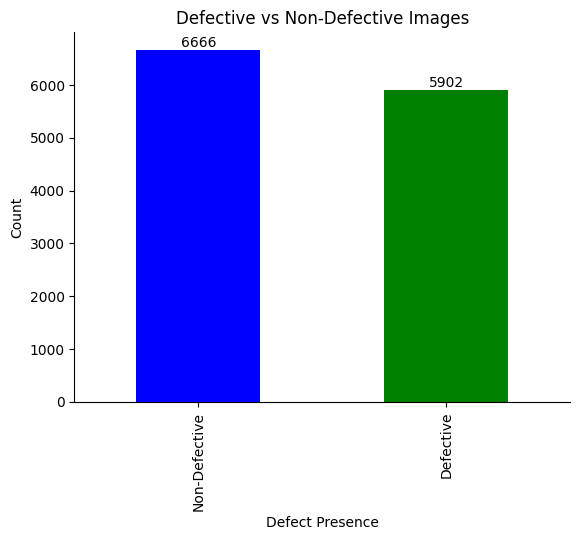

In [ ]:
# Count the number of defective and non-defective images
defect_counts = binary_label_pd['has_defect'].value_counts()

# Plot the distribution of defective vs non-defective images
ax = defect_counts.plot(kind='bar', title='Defective vs Non-Defective Images', color=['b', 'g'])
plt.xlabel('Defect Presence')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Defective', 'Defective'])
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding text annotations on top of the bars
for idx, value in enumerate(defect_counts):
    ax.text(idx, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


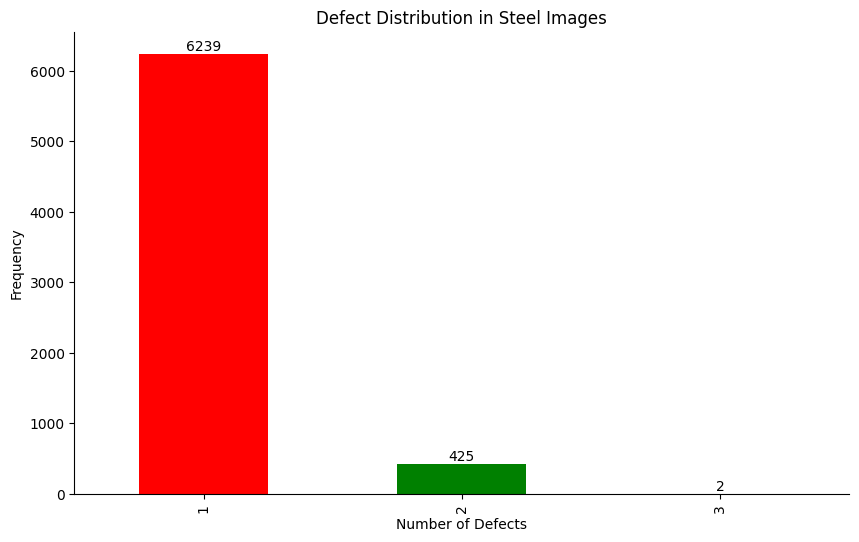

In [ ]:

# Count the number of defects per image
defect_counts_2 = df['ImageId'].value_counts().value_counts().sort_index()

# Plot the distribution of number of defects per image
ax = defect_counts_2.plot(kind='bar', figsize=(10, 6), color=['r', 'g', 'y', 'b'])
plt.xlabel('Number of Defects')
plt.ylabel('Frequency')
plt.title("Defect Distribution in Steel Images")
plt.xticks(ticks=range(len(defect_counts_2)), labels=defect_counts_2.index)
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding text annotations on top of the bars
for idx, value in enumerate(defect_counts_2):
    ax.text(idx, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


# Multi-Label Classification


In [ ]:
multi_data=[]
for i in df.ImageId.unique():
  z=np.zeros(4)
  for j in df[df.ImageId==i].ClassId.tolist():
    z[j-1]=1
  op=[]
  p=df[df.ImageId==i].ClassId.tolist()   #p -> list of ClassId values for the current ImageId


  if len(p)==1:                    #if there is only one defect type
    op.append(p[0])
  else:                              #If there are multiple defect types
    op.append(5)

  multi_data.append([i, z.tolist(), op])

multi_data[:10]


[['0002cc93b.jpg', [1.0, 0.0, 0.0, 0.0], [1]],
 ['0007a71bf.jpg', [0.0, 0.0, 1.0, 0.0], [3]],
 ['000a4bcdd.jpg', [1.0, 0.0, 0.0, 0.0], [1]],
 ['000f6bf48.jpg', [0.0, 0.0, 0.0, 1.0], [4]],
 ['0014fce06.jpg', [0.0, 0.0, 1.0, 0.0], [3]],
 ['0025bde0c.jpg', [0.0, 0.0, 1.0, 1.0], [5]],
 ['002af848d.jpg', [0.0, 0.0, 0.0, 1.0], [4]],
 ['002fc4e19.jpg', [1.0, 1.0, 0.0, 0.0], [5]],
 ['0030401a5.jpg', [0.0, 0.0, 0.0, 1.0], [4]],
 ['0046839bd.jpg', [0.0, 0.0, 1.0, 0.0], [3]]]

In [ ]:
multi_label=pd.DataFrame(list(map(lambda x:x[0],multi_data)),columns=['ImageId'])
defect_type=pd.DataFrame(list(map(lambda x:x[1],multi_data)),columns=['has_defect_1','has_defect_2','has_defect_3','has_defect_4'])

In [ ]:
multi_label_pd=pd.concat([multi_label,defect_type],axis=1)
multi_label_pd.head()

,ImageId,has_defect_1,has_defect_2,has_defect_3,has_defect_4
0,0002cc93b.jpg,1.0,0.0,0.0,0.0
1,0007a71bf.jpg,0.0,0.0,1.0,0.0
2,000a4bcdd.jpg,1.0,0.0,0.0,0.0
3,000f6bf48.jpg,0.0,0.0,0.0,1.0
4,0014fce06.jpg,0.0,0.0,1.0,0.0


In [ ]:
multi_label_pd['ImageLabel']=list(map(lambda x:x[2][0],multi_data))
multi_label_pd.head(10)

,ImageId,has_defect_1,has_defect_2,has_defect_3,has_defect_4,ImageLabel
0,0002cc93b.jpg,1.0,0.0,0.0,0.0,1
1,0007a71bf.jpg,0.0,0.0,1.0,0.0,3
2,000a4bcdd.jpg,1.0,0.0,0.0,0.0,1
3,000f6bf48.jpg,0.0,0.0,0.0,1.0,4
4,0014fce06.jpg,0.0,0.0,1.0,0.0,3
5,0025bde0c.jpg,0.0,0.0,1.0,1.0,5
6,002af848d.jpg,0.0,0.0,0.0,1.0,4
7,002fc4e19.jpg,1.0,1.0,0.0,0.0,5
8,0030401a5.jpg,0.0,0.0,0.0,1.0,4
9,0046839bd.jpg,0.0,0.0,1.0,0.0,3


([<matplotlib.axis.XTick at 0x79f996ed3970>,
 [Text(0, 0, 'Type 1'),
  Text(1, 0, 'Type 2'),
  Text(2, 0, 'Type 3'),
  Text(3, 0, 'Type 4'),
  Text(4, 0, 'Multiple Defects')])

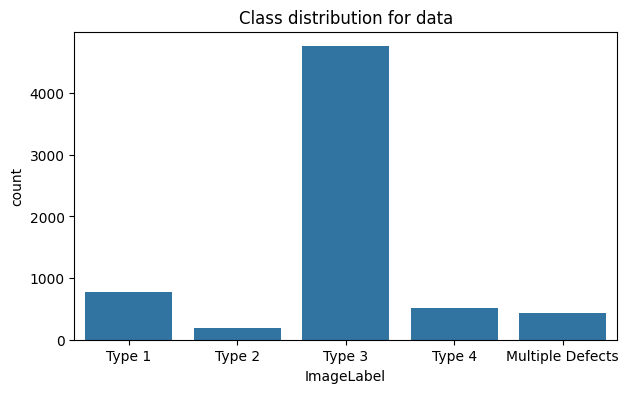

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(x='ImageLabel',data=multi_label_pd[multi_label_pd.ImageLabel!=0])
label=['Type 1','Type 2','Type 3','Type 4','Multiple Defects']
index=[0,1,2,3,4]
plt.title('Class distribution for data')
plt.xticks(index,label)

# Visualizing Image Samples

In [ ]:
train_images = os.listdir('train_images')
train_images[:5]

['40da1d1ad.jpg',
 'a664d8138.jpg',
 '794ccb4fa.jpg',
 '8d02760e9.jpg',
 'be447691b.jpg']

Shape of 40da1d1ad.jpg: (256, 1600, 3)


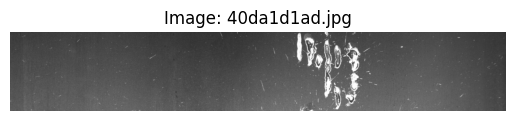

Shape of a664d8138.jpg: (256, 1600, 3)


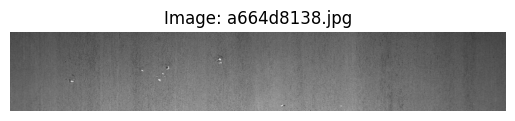

Shape of 794ccb4fa.jpg: (256, 1600, 3)


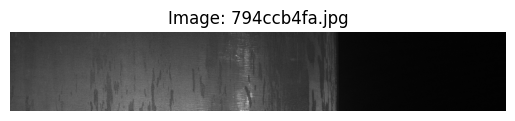

Shape of 8d02760e9.jpg: (256, 1600, 3)


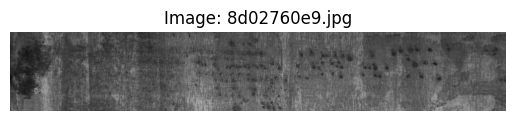

Shape of be447691b.jpg: (256, 1600, 3)


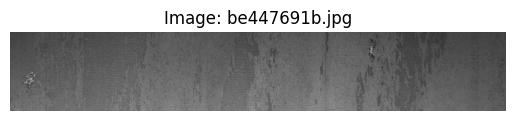

In [ ]:
train_image_dir = 'train_images'

train_images = os.listdir(train_image_dir)

num_images_to_display = 5
for i in range(min(num_images_to_display, len(train_images))):

    img_path = os.path.join(train_image_dir, train_images[i])

    try:
        img = cv2.imread(img_path)

        # Check if image is read successfully
        if img is not None:

            # Print the shape of the image
            print(f"Shape of {train_images[i]}: {img.shape}")
            # Convert color space if needed (BGR -> RGB for Matplotlib)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.figure()
            plt.imshow(img)
            plt.title(f"Image: {train_images[i]}")
            plt.axis('off')
            plt.show()
        else:
            print(f"Error reading image: {img_path}")

    except Exception as e:
        print(f"An error occurred while processing image {img_path}: {e}")


# RLE to Mask

#function to convert rle to mask

def rle2mask(rle, height, width):
  

  #creating a one dimentional array containing 0's of length obtained by multiplying height and width of the image
  
  mask = np.zeros(height*width).astype(np.uint8)

  #spliting the rle based on space , try running the rle.split() on separate cell to see how the values are separated based on space
  rle = rle.split()

  #selecting every second value in the list like obtaining values corresponding to indexes 0,2,4,....    
  start = rle[0::2]

  #selecting every second value in the list like obtaining values corresponding to indexes 1,3,5,....    
  length = rle[1::2]

  '''
  For example if rle value looks like this '4954 7 5800 20', in such a case elements belonging to even index like 4954, 5800
  are taken as start point and the values belong to odd index likr 7,20 are the length. So we need to add length to the respective
  start pixels like 4954+7 and 5800+20, to the ending point. Now, we need to  apply mask '1' in pixles from 4954 to 4961 and 5800 to 5820.
  '''

  
  #Now the shape of the mask is in one dimension, we need to convert the mask to the same dimension as the image, initally using reshape and followed by Transpose                               

In [ ]:
def read_image(image, flag='IMREAD_UNCHANGED'):
    #return numpy array
    if flag == 'IMREAD_UNCHANGED':
        return cv2.imread(image, cv2.IMREAD_UNCHANGED)
    elif flag == 'IMREAD_GRAYSCALE':
        return cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    else:
        raise Exception("Please provide valid flag")


In [ ]:
def transform(encoded_pixel, width=1600, height=256, fill_value=1):

    #"return mask of image size (height*width)"
    encoded_pixel_list = list(map(lambda x: int(x), encoded_pixel.split(' ')))
    n = len(encoded_pixel_list)

    encoded_pixel_list = [(encoded_pixel_list[i], encoded_pixel_list[i+1]) for i in range(0, n, 2)]

    #create a flat array of size width*height
    mask = np.zeros(height*width)

    for start, offset in encoded_pixel_list:
        mask[start-1:start+offset-1] = fill_value #minus 1 is because encoded pixel starts from 1 and not 0

    #transpose operation is necessary to match pixel number format
    mask = mask.reshape(width, height)
    return mask.T

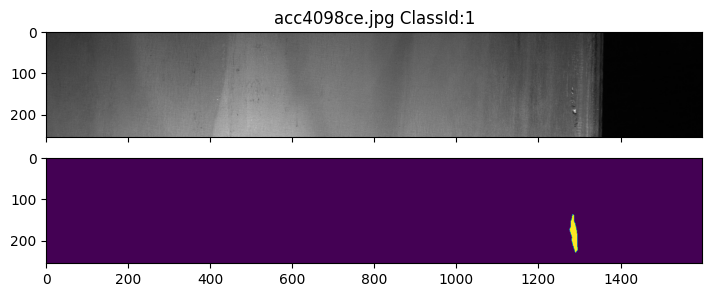

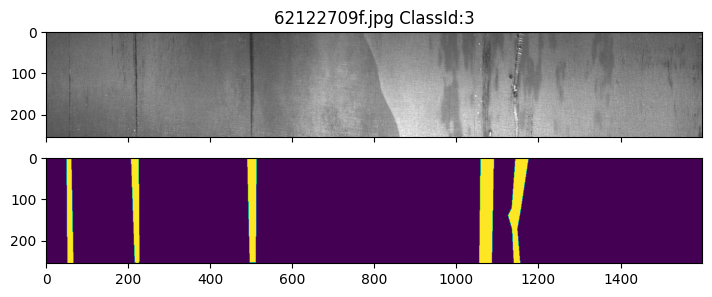

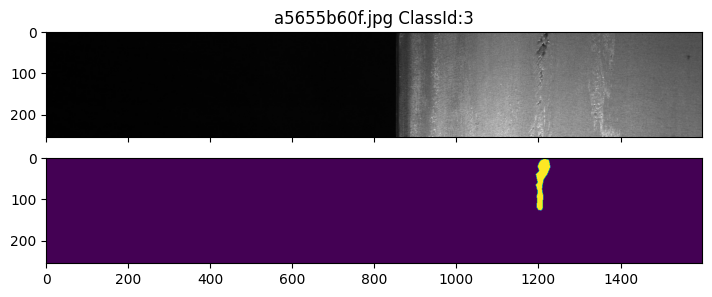

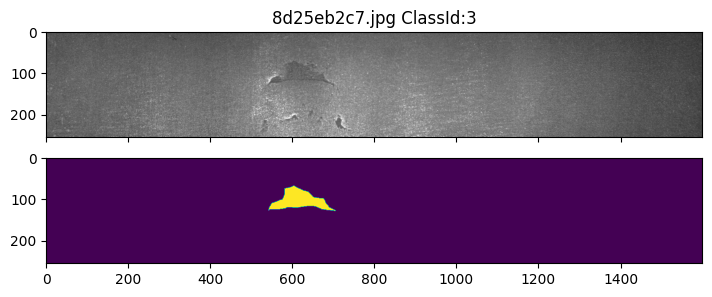

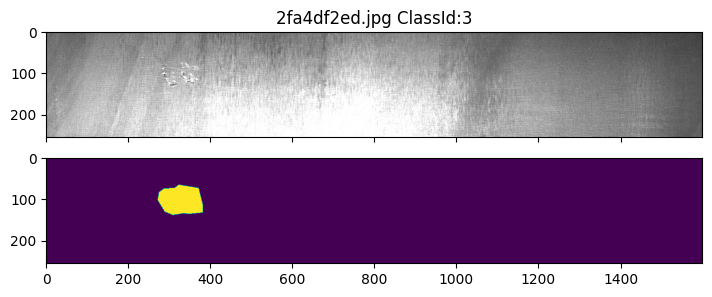

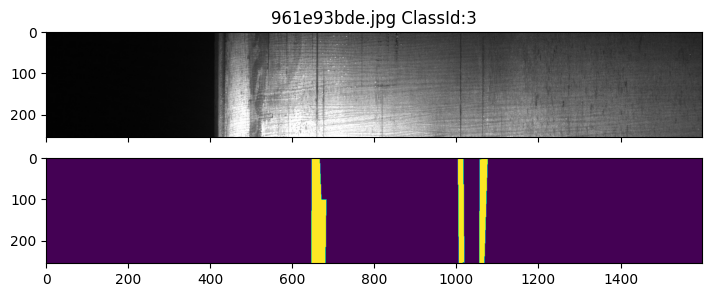

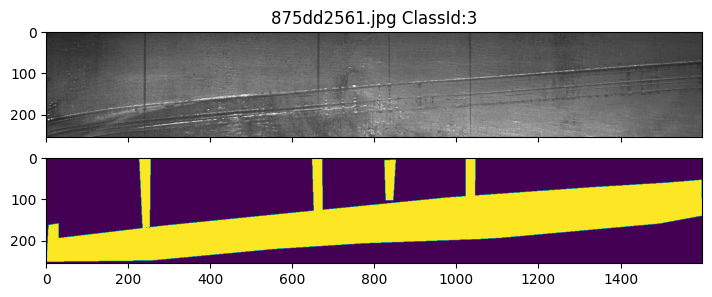

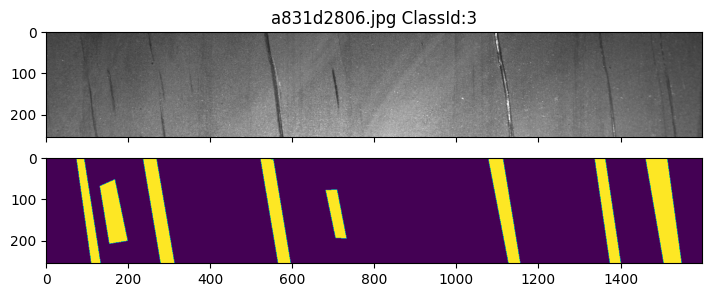

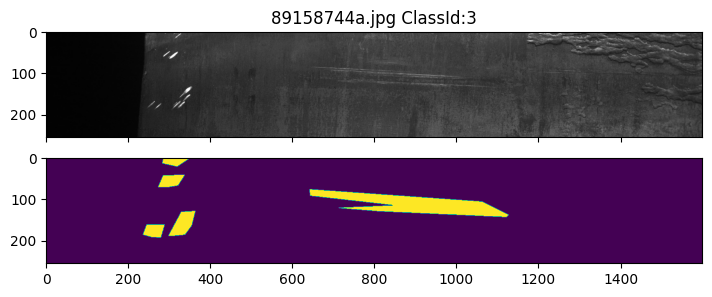

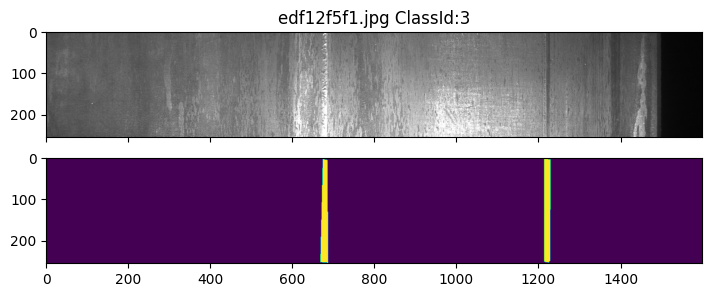

In [ ]:
#let us visualize some image along with its mask
for i in range(10):
    row_id = np.random.randint(0,df.shape[0])
    image_id, class_id, encoded_pixel = df.iloc[row_id, :3]

    #read image file from path
    image = read_image(os.path.join('train_images', image_id))
    height, width, channel = image.shape

    #return mask given encoded pixel
    mask = transform(encoded_pixel, width, height)

    #plot image and corresponding mask
    fig, axs = plt.subplots(2,1,figsize=(11,3),sharex=True)
    axs[0].imshow(image)
    axs[1].imshow(mask)
    axs[0].set_title(f'{image_id} ClassId:{class_id}')
    plt.show()

# Sum of Encoding

**Sum of Encoded pixels for Defect 1**

In [ ]:
# RLE to Mask

def rle2mask(mask_rle, shape=(1600,256)):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1])
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1

    return img.reshape(shape).T

def rle_mask_resize(rle):
    #convert image into 256,800
    if (pd.isnull(rle))|(rle==''):
        return np.zeros((256,800) ,dtype=np.uint8)

    a=cv2.resize(rle2mask(rle),(800,256))
    return a
def sum_enc(i):
    return sum([int(k) for k in i.split(' ')[1::2]])

In [ ]:

data=df

<ipython-input-28-04d2863e3f4f>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(se1)


<Axes: xlabel='sum_enc_1', ylabel='Density'>

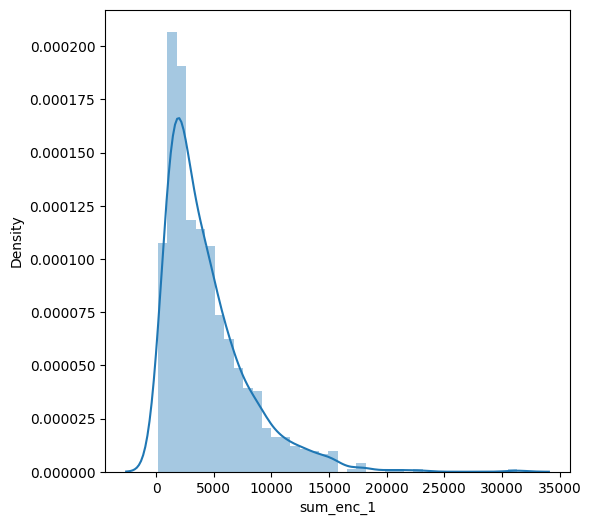

In [ ]:
sum_enc_1=[]
for i in range(data.shape[0]):
  if data['ClassId'][i]==1:
    a=data['EncodedPixels'][i].split(' ')[1::2]
    c=0
    for j in a:
      c=c+int(j)
    sum_enc_1.append(c)
  else:
    sum_enc_1.append(0)
data['sum_enc_1']=sum_enc_1
se1=data[data['sum_enc_1']!=0].sum_enc_1
#ploting
plt.figure(figsize=(6,6))
sns.distplot(se1)

X-Axis (sum_enc_1):

This axis represents the sum of pixel counts in the EncodedPixels column for steel defects of ClassId == 1

Y-Axis (Density):

This axis shows the density of images corresponding to the various sum_enc_1 values.

The bars represent the frequency of images within each range of sum_enc_1 values. The height of each bar shows how many images have a particular sum_enc_1 value.
The shape of the histogram suggests that most images have a small number of defect pixels, with fewer images having a large number of defect pixels.

In [ ]:
for i in range(0,100,10):
    s = np.sort(se1,axis = None)
    print("{} percentile value is {}".format(i,s[int(len(s)*(float(i)/100))]))
print("100 percentile value is ",s[-1])

0 percentile value is 163
10 percentile value is 1061
20 percentile value is 1539
30 percentile value is 2059
40 percentile value is 2574
50 percentile value is 3326
60 percentile value is 4205
70 percentile value is 5196
80 percentile value is 6687
90 percentile value is 9000
100 percentile value is  31303


0 Percentile (Minimum Value): 163

This is the minimum value in the dataset (sum_enc_1), meaning the smallest defect pixel count is 163.

10 Percentile: 1061

10% of the data has a defect pixel count less than or equal to 1061.

In [ ]:
for i in range(90,100):
    s = np.sort(se1,axis = None)
    print("{} percentile value is {}".format(i,s[int(len(s)*(float(i)/100))]))
print("100 percentile value is ",s[-1])

90 percentile value is 9000
91 percentile value is 9483
92 percentile value is 9832
93 percentile value is 10345
94 percentile value is 11022
95 percentile value is 11650
96 percentile value is 12470
97 percentile value is 13327
98 percentile value is 14529
99 percentile value is 15689
100 percentile value is  31303


In [ ]:
for i in np.arange(0.0, 1.0, 0.1):
    s = np.sort(se1,axis = None)
    print("{} percentile value is {}".format(99+i,s[int(len(s)*(float(99+i)/100))]))
print("100 percentile value is ",s[-1])


99.0 percentile value is 15689
99.1 percentile value is 15689
99.2 percentile value is 17050
99.3 percentile value is 17868
99.4 percentile value is 17946
99.5 percentile value is 17983
99.6 percentile value is 19997
99.7 percentile value is 21319
99.8 percentile value is 22844
99.9 percentile value is 31303
100 percentile value is  31303


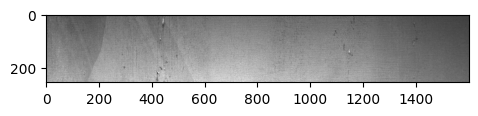

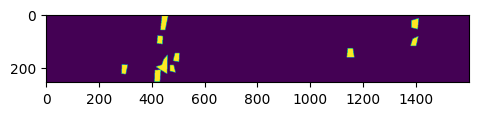

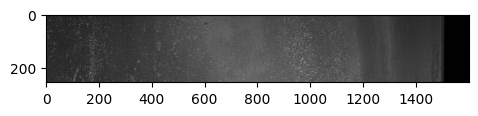

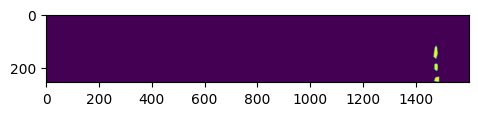

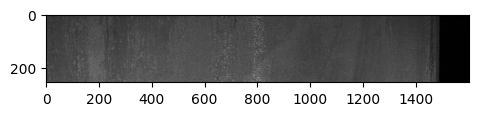

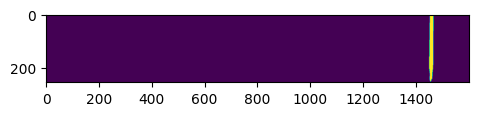

In [ ]:
c=40
for i in range(1,7):
  plt.figure(figsize=(12,12))
  if i%2==0:
    c=c+1
    plt.subplot(3, 2, i)
    plt.imshow(rle2mask(data[data.ClassId==1].iloc[c,:].values[2]))
  else:
    plt.subplot(3, 2, i)
    plt.imshow(cv2.imread('train_images/'+data[data.ClassId==1].iloc[c+1,:].values[0]))


**OBSERVATION**

In class 1, the sum of encoding start from 163

We can observe that after 17983 there is a sudden increase for 2k.

**Sum of Encoded pixels for Defect 2**




<ipython-input-33-164bff852b78>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(se2)


<Axes: xlabel='sum_enc_2', ylabel='Density'>

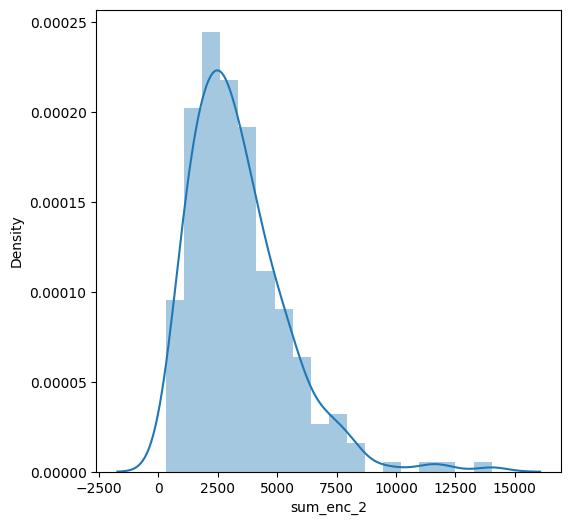

In [ ]:
sum_enc_2=[]
for i in range(data.shape[0]):
  if data['ClassId'][i]==2:
    a=data['EncodedPixels'][i].split(' ')[1::2]
    c=0
    for j in a:
      c=c+int(j)
    sum_enc_2.append(c)
  else:
    sum_enc_2.append(0)
data['sum_enc_2']=sum_enc_2
se2=data[data['sum_enc_2']!=0].sum_enc_2
plt.figure(figsize=(6,6))
sns.distplot(se2)

In [ ]:
for i in range(0,100,10):
    s = np.sort(se2,axis = None)
    print("{} percentile value is {}".format(i,s[int(len(s)*(float(i)/100))]))
print("100 percentile value is ",s[-1])

0 percentile value is 316
10 percentile value is 1209
20 percentile value is 1635
30 percentile value is 2172
40 percentile value is 2583
50 percentile value is 2944
60 percentile value is 3448
70 percentile value is 3989
80 percentile value is 4774
90 percentile value is 5914
100 percentile value is  14023


In [ ]:

for i in range(90,100):
    s = np.sort(se2,axis = None)
    print("{} percentile value is {}".format(i,s[int(len(s)*(float(i)/100))]))
print("100 percentile value is ",s[-1])

90 percentile value is 5914
91 percentile value is 5945
92 percentile value is 6342
93 percentile value is 6672
94 percentile value is 7001
95 percentile value is 7196
96 percentile value is 7552
97 percentile value is 7885
98 percentile value is 8309
99 percentile value is 11302
100 percentile value is  14023


In [ ]:
for i in np.arange(0.0, 1.0, 0.1):
    s = np.sort(se2,axis = None)
    print("{} percentile value is {}".format(99+i,s[int(len(s)*(float(99+i)/100))]))
print("100 percentile value is ",s[-1])

99.0 percentile value is 11302
99.1 percentile value is 11302
99.2 percentile value is 11973
99.3 percentile value is 11973
99.4 percentile value is 11973
99.5 percentile value is 11973
99.6 percentile value is 14023
99.7 percentile value is 14023
99.8 percentile value is 14023
99.9 percentile value is 14023
100 percentile value is  14023


In [ ]:
for i in np.arange(0.0, 1.0, 0.1):
    s = np.sort(se2,axis = None)
    print("{} percentile value is {}".format(99+i,s[int(len(s)*(float(99+i)/100))]))
print("100 percentile value is ",s[-1])

99.0 percentile value is 11302
99.1 percentile value is 11302
99.2 percentile value is 11973
99.3 percentile value is 11973
99.4 percentile value is 11973
99.5 percentile value is 11973
99.6 percentile value is 14023
99.7 percentile value is 14023
99.8 percentile value is 14023
99.9 percentile value is 14023
100 percentile value is  14023


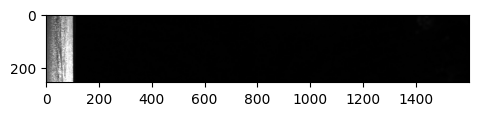

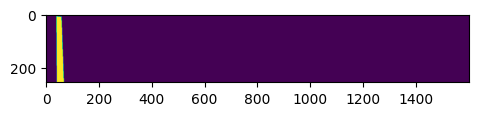

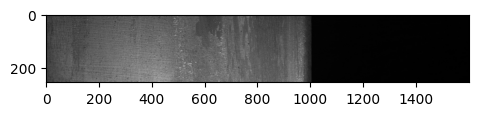

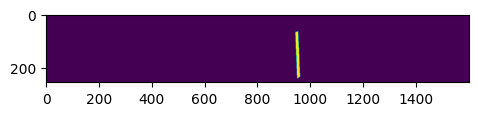

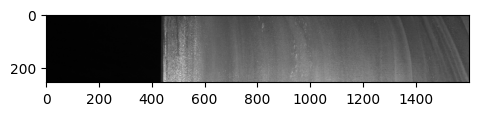

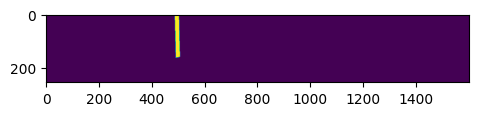

In [ ]:
c=4
for i in range(1,7):
  plt.figure(figsize=(12,12))
  if i%2==0:
    c=c+1
    plt.subplot(3, 2, i)
    plt.imshow(rle2mask(data[data.ClassId==2].iloc[c,:].values[2]))
  else:
    plt.subplot(3, 2, i)
    plt.imshow(cv2.imread('train_images/'+data[data.ClassId==2].iloc[c+1,:].values[0]))

**OBSERVATION**

In class 2, the sum of encoding start from 316

We can observe that after 8163 there is a sudden increase for 2k(approx).

**Sum of Encoded pixels for Defect 3**

<ipython-input-41-5f2de9b136d4>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(se3)


<Axes: xlabel='sum_enc_3', ylabel='Density'>

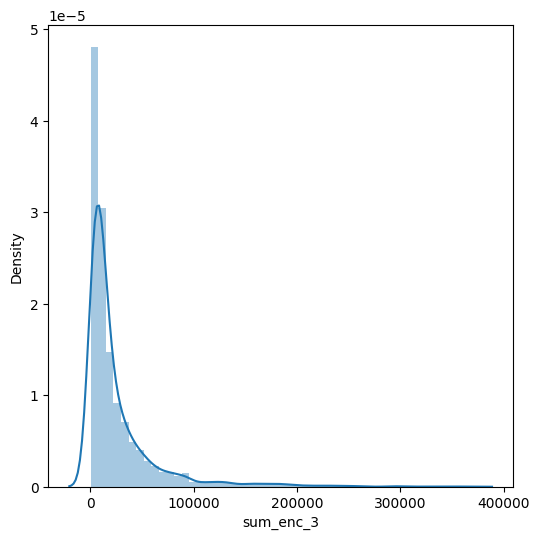

In [ ]:
sum_enc_3=[]
for i in range(data.shape[0]):
  if data['ClassId'][i]==3:
    a=data['EncodedPixels'][i].split(' ')[1::2]
    c=0
    for j in a:
      c=c+int(j)
    sum_enc_3.append(c)
  else:
    sum_enc_3.append(0)
data['sum_enc_3']=sum_enc_3
se3=data[data['sum_enc_3']!=0].sum_enc_3
plt.figure(figsize=(6,6))
sns.distplot(se3)

In [ ]:
for i in range(0,100,10):
    s = np.sort(se3,axis = None)
    print("{} percentile value is {}".format(i,s[int(len(s)*(float(i)/100))]))
print("100 percentile value is ",s[-1])

0 percentile value is 115
10 percentile value is 2787
20 percentile value is 4280
30 percentile value is 5939
40 percentile value is 8746
50 percentile value is 11960
60 percentile value is 15971
70 percentile value is 23425
80 percentile value is 35928
90 percentile value is 62034
100 percentile value is  368240


In [ ]:
for i in range(90,100):
    s = np.sort(se3,axis = None)
    print("{} percentile value is {}".format(i,s[int(len(s)*(float(i)/100))]))
print("100 percentile value is ",s[-1])

90 percentile value is 62034
91 percentile value is 67053
92 percentile value is 73230
93 percentile value is 79583
94 percentile value is 87117
95 percentile value is 94089
96 percentile value is 112542
97 percentile value is 131715
98 percentile value is 160856
99 percentile value is 193938
100 percentile value is  368240


In [ ]:
for i in np.arange(0.0, 1.0, 0.1):
    s = np.sort(se3,axis = None)
    print("{} percentile value is {}".format(99+i,s[int(len(s)*(float(99+i)/100))]))
print("100 percentile value is ",s[-1])

99.0 percentile value is 193938
99.1 percentile value is 198285
99.2 percentile value is 207701
99.3 percentile value is 211788
99.4 percentile value is 227070
99.5 percentile value is 232238
99.6 percentile value is 243166
99.7 percentile value is 252123
99.8 percentile value is 289556
99.9 percentile value is 316414
100 percentile value is  368240


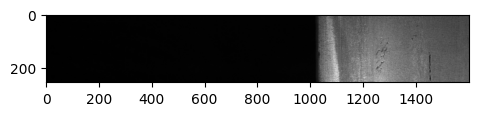

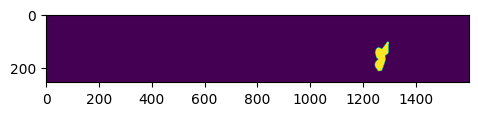

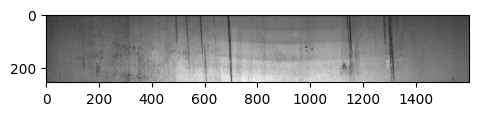

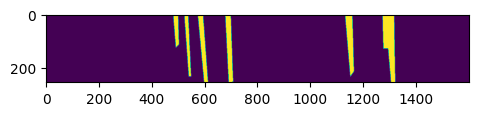

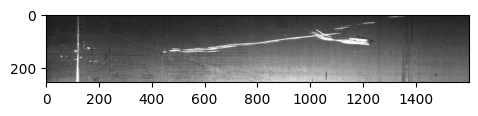

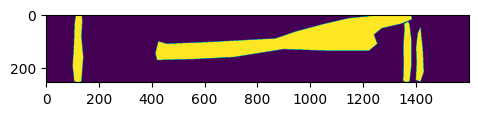

In [ ]:
c=4
for i in range(1,7):
  plt.figure(figsize=(12,12))
  if i%2==0:
    c=c+1
    plt.subplot(3, 2, i)
    plt.imshow(rle2mask(data[data.ClassId==3].iloc[c,:].values[2]))
  else:
    plt.subplot(3, 2, i)
    plt.imshow(cv2.imread('train_images/'+data[data.ClassId==3].iloc[c+1,:].values[0]))

**OBSERVATION**
The plot is very skewed. Which means there are only some images whose sum_encoding is greater than 100k.

In class 3, the sum of encoding start from 115

We can observe that after 162877 there is a sudden increase for 3k(approx).

**Sum of Encoded pixels for Defect 4**

<ipython-input-47-5ea350916106>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(se4)


<Axes: xlabel='sum_enc_4', ylabel='Density'>

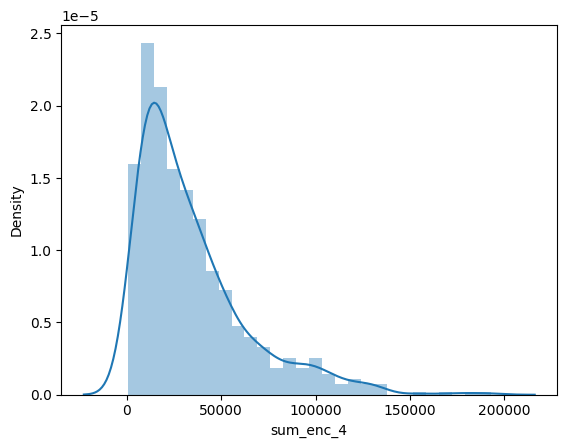

In [ ]:
sum_enc_4=[]
for i in range(data.shape[0]):
  if data['ClassId'][i]==4:
    a=data['EncodedPixels'][i].split(' ')[1::2]
    c=0
    for j in a:
      c=c+int(j)
    sum_enc_4.append(c)
  else:
    sum_enc_4.append(0)
data['sum_enc_4']=sum_enc_4
se4=data[data['sum_enc_4']!=0].sum_enc_4
sns.distplot(se4)

In [ ]:
for i in range(0,100,10):
    s = np.sort(se4,axis = None)
    print("{} percentile value is {}".format(i,s[int(len(s)*(float(i)/100))]))
print("100 percentile value is ",s[-1])

0 percentile value is 491
10 percentile value is 7090
20 percentile value is 11270
30 percentile value is 14671
40 percentile value is 19844
50 percentile value is 25357
60 percentile value is 32663
70 percentile value is 40546
80 percentile value is 52412
90 percentile value is 75187
100 percentile value is  192780


In [ ]:
for i in range(90,100):
    s = np.sort(se4,axis = None)
    print("{} percentile value is {}".format(i,s[int(len(s)*(float(i)/100))]))
print("100 percentile value is ",s[-1])

90 percentile value is 75187
91 percentile value is 80525
92 percentile value is 84157
93 percentile value is 88861
94 percentile value is 93957
95 percentile value is 98530
96 percentile value is 101415
97 percentile value is 108784
98 percentile value is 119340
99 percentile value is 129924
100 percentile value is  192780


In [ ]:
for i in np.arange(0.0, 1.0, 0.1):
    s = np.sort(se4,axis = None)
    print("{} percentile value is {}".format(99+i,s[int(len(s)*(float(99+i)/100))]))
print("100 percentile value is ",s[-1])

99.0 percentile value is 129924
99.1 percentile value is 131875
99.2 percentile value is 133065
99.3 percentile value is 133656
99.4 percentile value is 134071
99.5 percentile value is 134071
99.6 percentile value is 154818
99.7 percentile value is 171949
99.8 percentile value is 182380
99.9 percentile value is 192780
100 percentile value is  192780


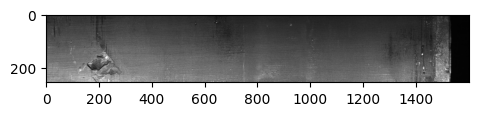

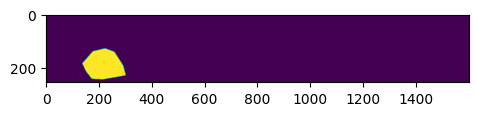

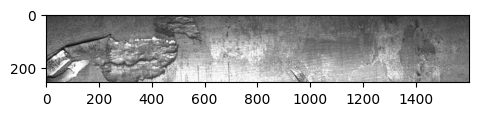

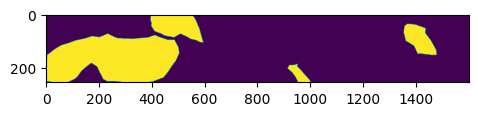

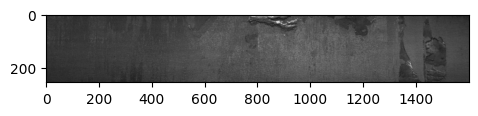

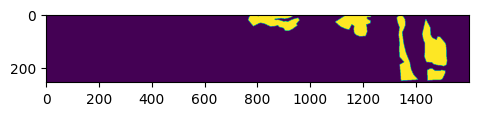

In [ ]:
c=4
for i in range(1,7):
  plt.figure(figsize=(12,12))
  if i%2==0:
    c=c+1
    plt.subplot(3, 2, i)
    plt.imshow(rle2mask(data[data.ClassId==4].iloc[c,:].values[2]))
  else:
    plt.subplot(3, 2, i)
    plt.imshow(cv2.imread('train_images/'+data[data.ClassId==4].iloc[c+1,:].values[0]))

